In [31]:
import obspy
from obspy import UTCDateTime
import numpy as np
from obspy.core.inventory import Station, Channel, Site
import matplotlib.pyplot as plt

In [32]:
import os
my_path = os.path.abspath("./plots")
my_file = 'grif'

In [33]:
station_list = ["grif"]
print(station_list[0])

grif


In [34]:
acc = np.loadtxt("obs_" + station_list[0]+".bbp", comments="#")
t = acc[:,0]
ns = acc[:,1] #Column 2: North-south acceleration (cm/s/s) (+ is northward)
ew = acc[:,2] #East-west acceleration (cm/s/s) (+ is eastward)
ver = acc[:,3] #Up-down acceleration (cm/s/s) (+ is upward)

Text(0.5, 0, 'Second [s]')

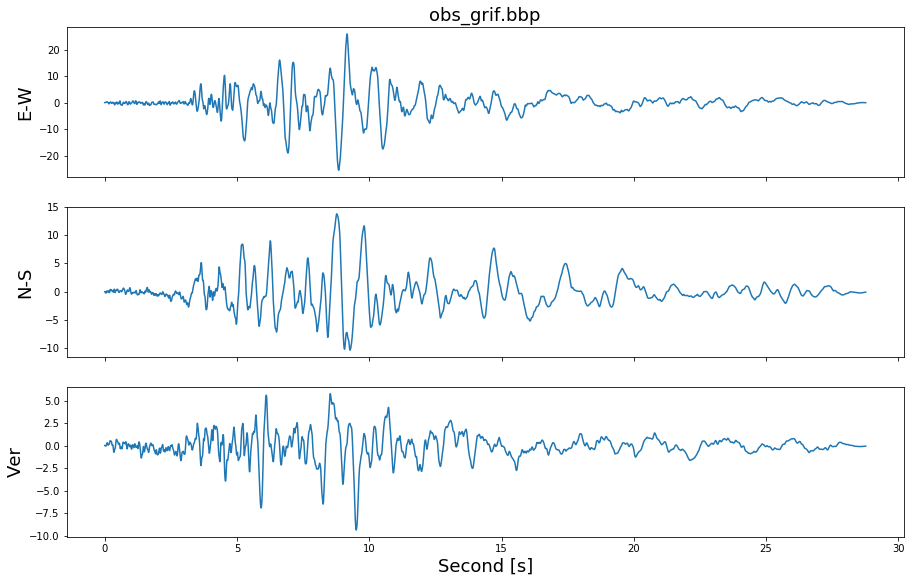

In [35]:

fig, axs = plt.subplots(3, 1, sharex='col',figsize = (15,15/1.6))

axs[0].plot(t, ew)
axs[0].set_title(str("obs_" + station_list[0]+".bbp"), fontsize=18)
axs[0].set_ylabel("E-W", fontsize=18)
axs[1].plot(t, ns)
axs[1].set_ylabel("N-S", fontsize=18)
#axs[1].set_title("N-S", fontsize=20)
axs[2].plot(t, ver)
axs[2].set_ylabel("Ver", fontsize=18)
axs[2].set_xlabel("Second [s]", fontsize=18)

#fig.tight_layout()
#fig.savefig(os.path.join(my_path, my_file))  

In [37]:
import Waveform
import re

In [38]:
def read(fileName):
  data = []
  coordinates = [float('nan')] * 3
  coordComment = re.compile('#\s*x(\d)\s+([0-9\.eE\+\-]+)')
  variables = ''
  p_0 = 0.
  t_s = 0.
  t_d = 0.
  f = open(fileName)
  for row in f:
    row = row.strip()
    if not row[0].isalpha() and not row[0] == '#':
      values = row.split()
      data.append([float(numeric_string) for numeric_string in values])
    elif row[0] == '#':
      match = coordComment.match(row)
      if match:
        coordinates[int(match.group(1))-1] = float(match.group(2))
      elif row[2:5] == 'P_0':
        p_0 = float(row[5:])
      elif row[2:5] == 'T_s':
        t_s = float(row[5:])
      elif row[2:5] == 'T_d':
        t_d = float(row[5:])
    elif row.startswith('VARIABLES'):
      row = row.split('=')
      variables = row[1].replace('"', '').split(',')
      variables = [v.strip() for v in variables]
  f.close()
  if len(data) == 0:
    return None
  if 'P_n' in variables:
    indexP_n = variables.index('P_n')
    data = [d[0:indexP_n] + [d[indexP_n] + p_0] + d[indexP_n+1:] for d in data]
  if 'T_s' in variables:
    indexT_s = variables.index('T_s')
    data = [d[0:indexT_s] + [d[indexT_s] + t_s] + d[indexT_s+1:] for d in data]
  if 'T_d' in variables:
    indexT_d = variables.index('T_d')
    data = [d[0:indexT_d] + [d[indexT_d] + t_d] + d[indexT_d+1:] for d in data]
  return Waveform.Waveform(variables, data, coordinates)

In [39]:
wave = read('sim_grif.bbp')

In [40]:
wave.waveforms

{'xx': array([     0.        ,      0.        ,      0.        , ...,
         49495.3932413 ,  48974.24238267,  48492.7998997 ]),
 'yy': array([    0.        ,     0.        ,     0.        , ...,  1563.62031849,
         4490.0090481 ,  7363.98891483]),
 'zz': array([    0.        ,     0.        ,     0.        , ...,  1586.98660094,
         1647.6196317 ,  1707.50439169]),
 'xy': array([     0.        ,      0.        ,      0.        , ...,
         59834.18042917,  58823.66014001,  57811.86356991]),
 'yz': array([    0.        ,     0.        ,     0.        , ...,  4687.43205389,
         4824.03864531,  4957.03588423]),
 'xz': array([    0.        ,     0.        ,     0.        , ...,  7045.89204546,
         6944.83588546,  6848.58014626]),
 'u': array([ 0.        ,  0.        ,  0.        , ...,  0.00207712,
         0.00204857,  0.0020183 ]),
 'v': array([ 0.        ,  0.        ,  0.        , ..., -0.00013027,
         0.000191  ,  0.00050886]),
 'w': array([ 0.        , 

In [44]:
w = wave.waveforms['w']
v = wave.waveforms['v']
u = wave.waveforms['u']

In [48]:
t = wave.time
t[-1]

29.994999999998321

Text(0.5, 0, 'Second [s]')

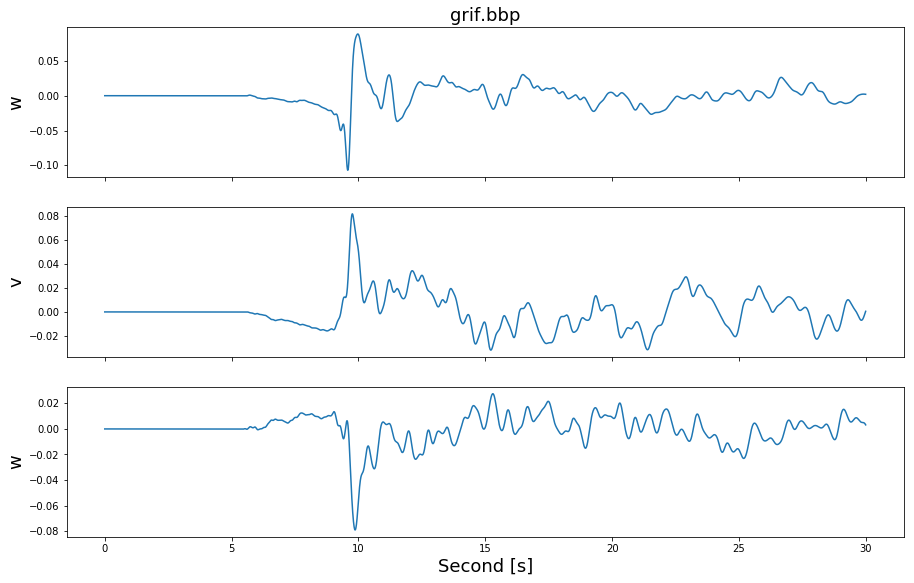

In [46]:
fig, axs = plt.subplots(3, 1, sharex='col',figsize = (15,15/1.6))

axs[0].plot(t, u)
axs[0].set_title(str(station_list[0]+".bbp"), fontsize=18)
axs[0].set_ylabel("w", fontsize=18)
axs[1].plot(t, v)
axs[1].set_ylabel("v", fontsize=18)
#axs[1].set_title("N-S", fontsize=20)
axs[2].plot(t, w)
axs[2].set_ylabel("w", fontsize=18)
axs[2].set_xlabel("Second [s]", fontsize=18)